Q-table :
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


100%|██████████| 1000/1000 [00:00<00:00, 8259.45it/s]

Q-table after training :
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.225   0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


<BarContainer object of 1000 artists>

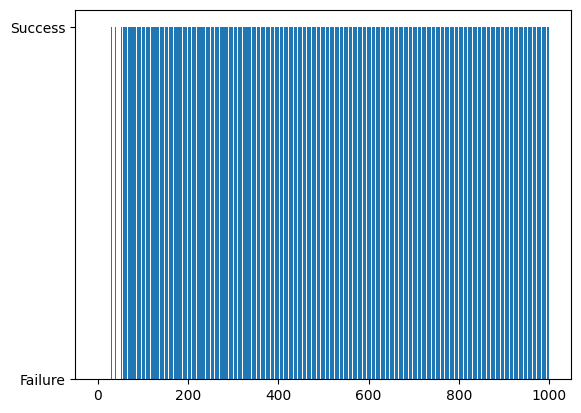

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm

environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")
environment.reset()

nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print("Q-table :")
print(qtable) # ajanin beyni

episodes = 1000 # kac kere oynanacak
alpha = 0.5 # learning rate
gamma = 0.9 # discount rate

outcomes = []

# training
for _ in tqdm(range(episodes)):

    state, _ = environment.reset()
    done = False # ajanin basari durumu

    outcomes.append("Failure")

    while not done: # ajan basarili olana kadar state icerisinde hareket et (action sec ve uygula)

        # action
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()
        
        new_state, reward, done, info, _ = environment.step(action)

        # update q-table
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state

        if reward:
            outcomes[-1] = "Success"

print("Q-table after training :")
print(qtable)

plt.bar(range(episodes), outcomes)